In [25]:
# Imports
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample', 'entropy', 'plt', 'choice', 'gamma', 'flatten']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
# Load all data
fn = '../../results/BNG05/gamma-1/BNG05-zeta-1-run-0001'
params = load_BNG_simulation(fn.format(1), params_only=True)

dfs = []
for gamma in [1, 5, 10, 20, 50, 100, 1000, 100000000]:
    for zeta in [1, 1.5, 2, 5, 10, 100]:
        fn = '../../results/BNG05/gamma-{}/BNG05-zeta-{}-stats.csv'.format(gamma, zeta)
        try:
            df = pd.read_csv(fn, index_col=0)
            df['gamma'] = gamma
            df['zeta'] = zeta
            dfs.append(df.iloc[:20,:])
        except: pass
        
# Combine in one Dataframe
df = pd.concat(dfs)
df.index = [df['gamma'], df['zeta']]
del df['gamma']
del df['zeta']

# Normalize entropies, JSDs etc.
N, K, T = params['N'], params['K'], params['T']
df['jsd_phis'] = df['jsd_phis'] / np.log2(N)
df['jsd_alpha_mphi'] = df['jsd_alpha_mphi'] / np.log2(2)
df['entropy_mphi'] = df['entropy_mphi'] / np.log2(K)
df['jsd_mphi_psi'] = df['jsd_mphi_psi'] / np.log2(2)
df['entropy_psi'] = df['entropy_psi'] / np.log2(K)
df['jsd_psi_alpha'] = df['jsd_psi_alpha'] / np.log2(2)

slice_size = 2000
slices = T//slice_size
df['jsd_psi_slices'] = df['jsd_psi_slices'] / np.log2(slices)   

# Compute the means
means = df.mean(axis=0, level=[0,1])

# Entropy of prior
alpha_ps = params['alpha'] / params['alpha'].sum()
entropy_alpha = entropy(alpha_ps) / np.log2(K)

In [23]:
settings = {
    'entropy_mphi': {
        'title': r'Relative entropy of mean distribution: $\hatH(\bar{\varphi})$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            {
                'text': r'$\hat H(\alpha) = {:.3f}$'.format(entropy_alpha), 
                'y': entropy_alpha, 
                'x': 1.09
            },
            { 'text': 'uniform', 'y': 1},
            { 'text': 'deterministic', 'y': 0}
        ]
    },
    'jsd_alpha_mphi': {
        'title': r'Divergence between mean distribution and prior: $\mathsf{JSD}(\alpha, \bar{\varphi})$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
        
    },
    'jsd_phis': {
        'title': r'Divergence between agent distributions: $\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'pearson_r': {
        'title': r'Pearson corr. coefficient ($\log(t)$ vs $\log(\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$)',
        'vmin': -1, 'vmax':1,
        'cmap': CustomCmap('blue', 'orange', via_rgb='white'),
        'annotate_cb': [
            { 'text': 'divergence', 'y': 1},
            { 'text': 'no convergence', 'y': .5},
            { 'text': 'convergence', 'y': 0}
        ]
    },
    'std_jsd_phis': {
        'title': r'Standard deviation of $\mathsf{JSD}(\varphi_1, \dots, \varphi_N)$ over time',
        'vmin': 0, 'vmax': .2,
        'annotate_cb': [
            { 'text': 'less stable', 'y': 1},
            { 'text': 'very stable', 'y': 0}
        ]
    },
    'jsd_mphi_psi': {
        'title': r'Divergence between mean dist. and time average: $\mathsf{JSD}(\bar{\varphi}, \psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'jsd_psi_alpha': {
        'title': r'Divergence between time average and prior: $\mathsf{JSD}(\alpha, \psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            { 'text': 'maximally\ndifferent', 'y': 1},
            { 'text': 'identical', 'y': 0}
        ]
    },
    'jsd_psi_slices': {
        'title': r'Variability: $\mathsf{JSD}\left(\psi^{(0:t)}, \dots, \psi^{(T-t:T)}\right)$',
        'vmin': 0, 'vmax':.2,
        'annotate_cb': [
            { 'text': 'identical', 'y': 0}
        ]
    },
    'entropy_psi': {
        'title': r'Relative entropy of time average: $\hat H(\psi)$',
        'vmin': 0, 'vmax':1,
        'annotate_cb': [
            {
                'text': r'$\hat H(\alpha) = {:.3f}$'.format(entropy_alpha), 
                'y': entropy_alpha, 
                'x': 1.09
            },
            { 'text': 'uniform', 'y': 1},
            { 'text': 'deterministic', 'y': 0}
        ]
    }
}

/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/matplotlib/mathtext.py:851: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


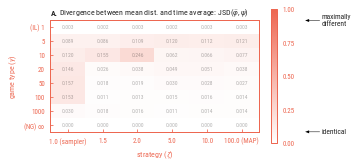

In [24]:
# Plot 

def annotate_colorbar(text, y, x=1.22):
    gca().annotate(text, xy=(x, y), xytext=(1.3, y), xycoords='axes fraction',
                fontsize = 7.5, ha='left', va='center', 
                arrowprops=dict(facecolor='black', width=.5, headlength=4, headwidth=3))

def plot_result(name):
    props = settings[name]
    figure(figsize=cm2inch(8,8))
    ax=gca()
    df = means[name].unstack()
    if 'cmap' in props:
        cmap = props['cmap']
    else:
        cmap = CustomCmap('white', 'orange')
    im = imshow(df, aspect=1/2.5, interpolation='none', cmap=cmap,
               vmin=props['vmin'], vmax=props['vmax'])

    # Add text to every cell
    for i, (gamma, row) in enumerate(df.iterrows()):
        for j, (zeta, val) in enumerate(row.items()):
            txt = '{:.3f}'.format(val)
            gca().text(j, i, txt, va='center', ha='center', 
                       color='k', fontsize=5.5, alpha=.3)

    # labels
    if True:

        title(props['title'])

        ylabels = ['{}'.format(g) for g in df.index[:-1].tolist()]
        ylabels += ['(NG) $\infty$']
        ylabels[0] = '(IL) '+ ylabels[0]
        yticks(arange(len(df.index)), ylabels)
        ylabel('game type ($\gamma$)')

        xlabels = ['{}'.format(z) for z in df.columns]
        xlabels[0] = xlabels[0] + ' (sampler)'
        xlabels[-1] = xlabels[-1] + ' (MAP)'
        xticks(arange(len(df.columns)), xlabels)
        xlabel('strategy ($\zeta$)')

        restyle_title(ax)
        cb = colorbar(im, fraction=0.0295)
        tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator
        cb.update_ticks()


        if 'annotate_cb' in props:
            for ann in props['annotate_cb']:
                annotate_colorbar(**ann)

    subplots_adjust(left=0, bottom=0, right=1, top=1)
    savefig('BNG05-{}-results.png'.format(name), bbox_inches='tight')

# Plot all things    
plot_result('jsd_mphi_psi')

In [ ]:
# Generate all plots
for name in settings:
    plot_result(name);